# Testing validity with IL Synthesis Dataset

## Import Synthesis Dataset

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [50]:
def loadDataset(path):
    a = pd.read_csv(path)
    return a.drop(a.columns[0], axis=1)
def groupByRace(dataset):
    return dataset.groupby(by = ["race"])
def groupByFIPS(dataset):
    return dataset.groupby(by = ["FIPS"])
def groupByFIPSAndRace(dataset):
    return dataset.groupby(by = ["FIPS", "race"])

In [51]:
ILdataset = loadDataset('./data/generatedDatasets/IL_dataset_50thousand.csv')

In [52]:
ILdataset.groupby(by = ["FIPS"]).FIPS.count()

FIPS
170010001001017    1
170010001001018    1
170010001001036    2
170010001001042    2
170010001002002    1
                  ..
172030307003102    1
172030307003138    1
172030307003154    1
172030307003160    1
172030307003193    1
Name: FIPS, Length: 39529, dtype: int64

In [53]:
ILdataset.groupby(by = ["race"]).FIPS.count()

race
P1_003N    30659
P1_004N     7048
P1_005N      388
P1_006N     2893
P1_007N       16
P1_008N     4443
P1_011N      436
P1_012N      437
P1_013N      398
P1_014N       17
P1_015N     2771
P1_016N       44
P1_017N       24
P1_018N        4
P1_019N       80
P1_020N        3
P1_022N       84
P1_023N       13
P1_024N       29
P1_025N        6
P1_027N       40
P1_028N        6
P1_030N       30
P1_031N        4
P1_032N        2
P1_033N       71
P1_034N        6
P1_035N       15
P1_038N        1
P1_039N        4
P1_040N        1
P1_045N        1
P1_048N        4
P1_050N       10
P1_052N        1
P1_054N        1
P1_055N        1
P1_057N        2
P1_063N        4
P1_064N        1
P1_071N        2
Name: FIPS, dtype: int64

In [54]:
ILdataset.groupby(by = ["FIPS","race"]).FIPS.agg(['count'])

,,count
FIPS,race,
170010001001017,P1_015N,1
170010001001018,P1_003N,1
170010001001036,P1_003N,2
170010001001042,P1_003N,2
170010001002002,P1_003N,1
...,...,...
172030307003102,P1_003N,1
172030307003138,P1_003N,1
172030307003154,P1_003N,1


In [55]:
ILDatasetProcessed = pd.DataFrame(ILdataset.groupby(by = ["FIPS","race"]).FIPS.agg(['count'])).reset_index()
ILDatasetProcessed

,FIPS,race,count
0,170010001001017,P1_015N,1
1,170010001001018,P1_003N,1
2,170010001001036,P1_003N,2
3,170010001001042,P1_003N,2
4,170010001002002,P1_003N,1
...,...,...,...
43367,172030307003102,P1_003N,1
43368,172030307003138,P1_003N,1
43369,172030307003154,P1_003N,1
43370,172030307003160,P1_003N,1


## Import Real FIPS Data

In [56]:
from state import StateByBlockGroup
StateIL = StateByBlockGroup("17")
StateIL.decennialData

,GEO_ID,NAME,P1_001N,P1_001NA,P1_002N,P1_002NA,P1_003N,P1_003NA,P1_004N,P1_004NA,...,P1_069N,P1_069NA,P1_070N,P1_070NA,P1_071N,P1_071NA,state,county,tract,block
0,1000000US170010001001000,"Block 1000, Block Group 1, Census Tract 1, Ada...",17,NaN,17,NaN,16,NaN,1,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1000
1,1000000US170010001001001,"Block 1001, Block Group 1, Census Tract 1, Ada...",2,NaN,2,NaN,1,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1001
2,1000000US170010001001002,"Block 1002, Block Group 1, Census Tract 1, Ada...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1002
3,1000000US170010001001003,"Block 1003, Block Group 1, Census Tract 1, Ada...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1003
4,1000000US170010001001004,"Block 1004, Block Group 1, Census Tract 1, Ada...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,1,100,1004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369973,1000000US172030307003228,"Block 3228, Block Group 3, Census Tract 307, W...",11,NaN,11,NaN,11,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3228
369974,1000000US172030307003229,"Block 3229, Block Group 3, Census Tract 307, W...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3229
369975,1000000US172030307003230,"Block 3230, Block Group 3, Census Tract 307, W...",0,NaN,0,NaN,0,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3230
369976,1000000US172030307003231,"Block 3231, Block Group 3, Census Tract 307, W...",7,NaN,6,NaN,6,NaN,0,NaN,...,0,NaN,0,NaN,0,NaN,17,203,30700,3231


In [57]:
def processRealDataset(datasetdf):
    datasetdf["FIPS"] = datasetdf["GEO_ID"].map(lambda x: x[-15:])
    return datasetdf[["FIPS",
                'P1_003N', 'P1_004N', 'P1_005N', 'P1_006N', 'P1_007N',
                'P1_008N', 'P1_011N', 'P1_012N', 'P1_013N', 'P1_014N',
                'P1_015N', 'P1_016N', 'P1_017N', 'P1_018N', 'P1_019N',
                'P1_020N', 'P1_021N', 'P1_022N', 'P1_023N', 'P1_024N',
                'P1_025N', 'P1_027N', 'P1_028N', 'P1_029N', 'P1_030N',
                'P1_031N', 'P1_032N', 'P1_033N', 'P1_034N', 'P1_035N',
                'P1_036N', 'P1_037N', 'P1_038N', 'P1_039N', 'P1_040N',
                'P1_041N', 'P1_042N', 'P1_043N', 'P1_044N', 'P1_045N',
                'P1_046N', 'P1_048N', 'P1_049N', 'P1_050N', 'P1_051N',
                'P1_052N', 'P1_053N', 'P1_054N', 'P1_055N', 'P1_056N',
                'P1_057N', 'P1_058N', 'P1_059N', 'P1_060N', 'P1_061N',
                'P1_062N', 'P1_063N', 'P1_064N', 'P1_065N', 'P1_066N',
                'P1_067N', 'P1_068N', 'P1_069N', 'P1_071N'
            ]]

In [58]:
processedRealILDataset = processRealDataset(StateIL.decennialData)
processedRealILDataset

,FIPS,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,P1_011N,P1_012N,P1_013N,...,P1_061N,P1_062N,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_071N
0,170010001001000,16,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,170010001001001,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,170010001001002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,170010001001003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,170010001001004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369973,172030307003228,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369974,172030307003229,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369975,172030307003230,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369976,172030307003231,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Comparing the two datasets distributions

## By Races

In [59]:
popByRaceSynthesis = ILdataset.groupby(by = ["race"]).FIPS.count()
popByRaceSynthesis

race
P1_003N    30659
P1_004N     7048
P1_005N      388
P1_006N     2893
P1_007N       16
P1_008N     4443
P1_011N      436
P1_012N      437
P1_013N      398
P1_014N       17
P1_015N     2771
P1_016N       44
P1_017N       24
P1_018N        4
P1_019N       80
P1_020N        3
P1_022N       84
P1_023N       13
P1_024N       29
P1_025N        6
P1_027N       40
P1_028N        6
P1_030N       30
P1_031N        4
P1_032N        2
P1_033N       71
P1_034N        6
P1_035N       15
P1_038N        1
P1_039N        4
P1_040N        1
P1_045N        1
P1_048N        4
P1_050N       10
P1_052N        1
P1_054N        1
P1_055N        1
P1_057N        2
P1_063N        4
P1_064N        1
P1_071N        2
Name: FIPS, dtype: int64

In [60]:
popByRaceReal = processedRealILDataset.drop(['FIPS'], axis=1).sum(axis = 0)
popByRaceReal

P1_003N    7868227
P1_004N    1808271
P1_005N      96498
P1_006N     754878
P1_007N       4501
            ...   
P1_066N         35
P1_067N         14
P1_068N          4
P1_069N         15
P1_071N         84
Length: 64, dtype: int64

### Plot samples

In [61]:
popByRaceSynthesis /= popByRaceSynthesis.sum()
popByRaceReal /= popByRaceReal.sum()

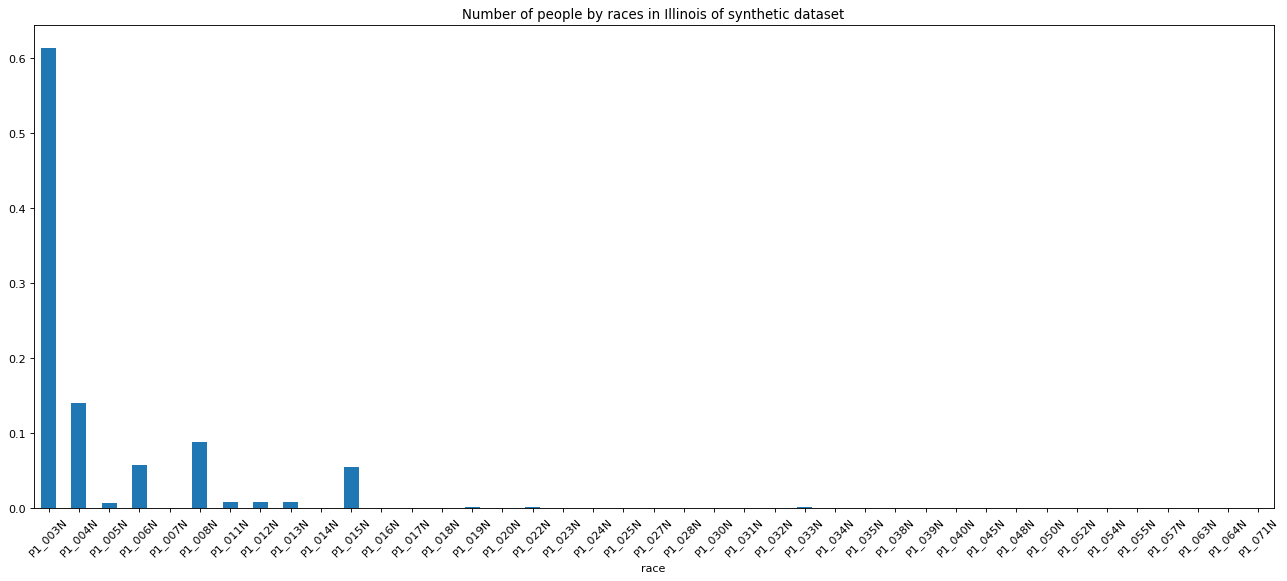

In [62]:
plt.figure(figsize=(20, 8), dpi=80)
popByRaceSynthesis.plot.bar(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of synthetic dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

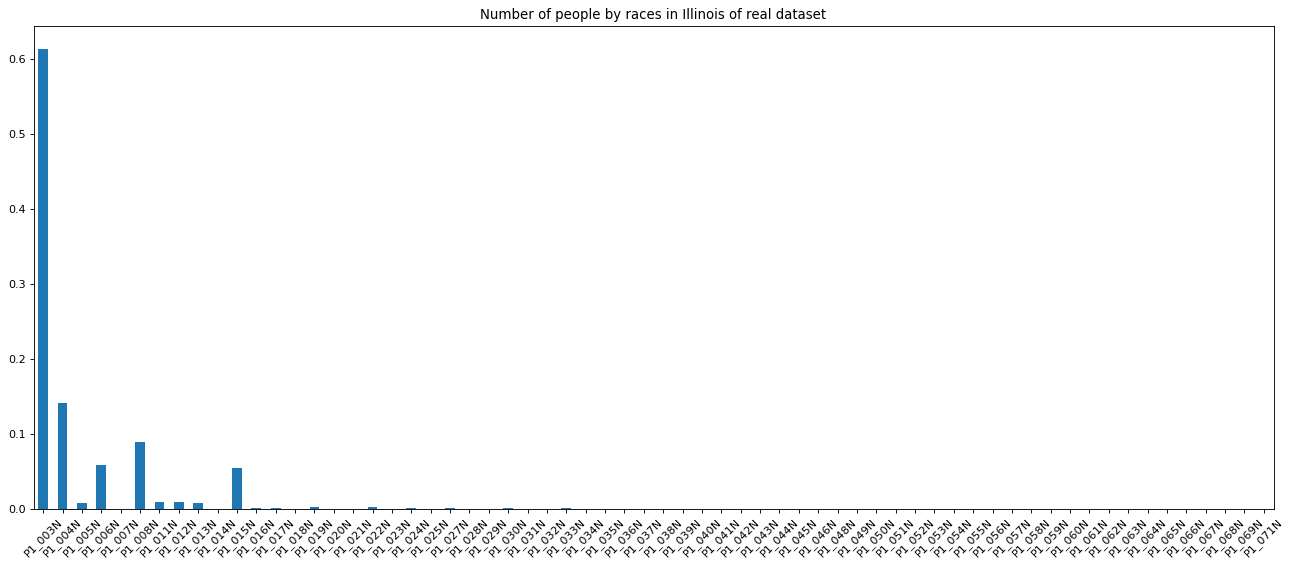

In [63]:
plt.figure(figsize=(20, 8), dpi=80)
popByRaceReal.plot.bar(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of real dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Compare sample mean and standard deviation

In [64]:
print("Mean of synthetic dataset", popByRaceSynthesis.mean())
print("Standard deviation of synthetic dataset", popByRaceSynthesis.std())

Mean of synthetic dataset 0.024390243902439025
Standard deviation of synthetic dataset 0.09824340854448721


In [65]:
print("Mean of real dataset", popByRaceReal.mean())
print("Standard deviation of real dataset", popByRaceReal.std())

Mean of real dataset 0.015625
Standard deviation of real dataset 0.07927505077520923


### Compare distribution by two sample t-test

$H_0: \mu_1 = \mu_2$ (population mean of synthetic dataset is equal to real dataset)

$H_1: \mu_1 \neq \mu_2$ (population mean of synthetic dataset is different from real dataset)

In [66]:
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=popByRaceSynthesis, b=popByRaceReal, equal_var=True)

Ttest_indResult(statistic=0.5028836668035106, pvalue=0.6161196827276053)

Due to p value = 0.9999535792552408 >> 0.05. Therefore, there is no evidence to support population mean of synthetic dataset is different from real dataset.

### Test for Homogeneity

$H_0$: The distributions of the two populations are the same.

$H_1$: The distributions of the two populations are not the same.


In [67]:
popByRaceReal.name = "Real"
popByRaceSynthesis.name = "Synthesis"
mergeddf = pd.merge(popByRaceSynthesis, popByRaceReal, right_index = True,
               left_index = True)

mergeddf

,Synthesis,Real
P1_003N,0.61318,0.614073
P1_004N,0.14096,0.141126
P1_005N,0.00776,0.007531
P1_006N,0.05786,0.058914
P1_007N,0.00032,0.000351
P1_008N,0.08886,0.088592
P1_011N,0.00872,0.008687
P1_012N,0.00874,0.008419
P1_013N,0.00796,0.007096
P1_014N,0.00034,0.000242


In [68]:
stat, p, dof, expected = stats.chi2_contingency(mergeddf)
p

1.0

In [69]:
# interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


Due to p value = 0.9908510047877276 >> 0.05. Therefore, there is no evidence to support population mean of synthetic dataset is different from real dataset.

### K-S test

$H_0: $ The two datasets come from the same ditribution 

$H_1: $ The two datasets NOT come from the same ditribution 


In [70]:
stats.ks_2samp(popByRaceSynthesis, popByRaceReal)

KstestResult(statistic=0.40625, pvalue=0.00031221827780527543)

Due to p value = 0.9999999044253438 >> 0.05. Therefore, there is no evidence to support the distributions of the two populations are not the same.

## By FIPS

In [71]:
popByFIPSSynthesis = ILdataset.groupby(by = ["FIPS"]).FIPS.count()
popByFIPSSynthesis = popByFIPSSynthesis.rename(lambda x: str(x))
popByFIPSSynthesis

FIPS
170010001001017    1
170010001001018    1
170010001001036    2
170010001001042    2
170010001002002    1
                  ..
172030307003102    1
172030307003138    1
172030307003154    1
172030307003160    1
172030307003193    1
Name: FIPS, Length: 39529, dtype: int64

In [72]:
popByFIPSReal = processedRealILDataset.drop(['FIPS'], axis=1).sum(axis = 1)
popByFIPSReal = popByFIPSReal.rename(processedRealILDataset['FIPS'])
popByFIPSReal

170010001001000    17
170010001001001     2
170010001001002     0
170010001001003     0
170010001001004     0
                   ..
172030307003228    11
172030307003229     0
172030307003230     0
172030307003231     7
172030307003232     0
Length: 369978, dtype: int64

In [73]:
popByFIPSSynthesis /= popByFIPSSynthesis.sum()
popByFIPSReal /= popByFIPSReal.sum()

### Plot samples

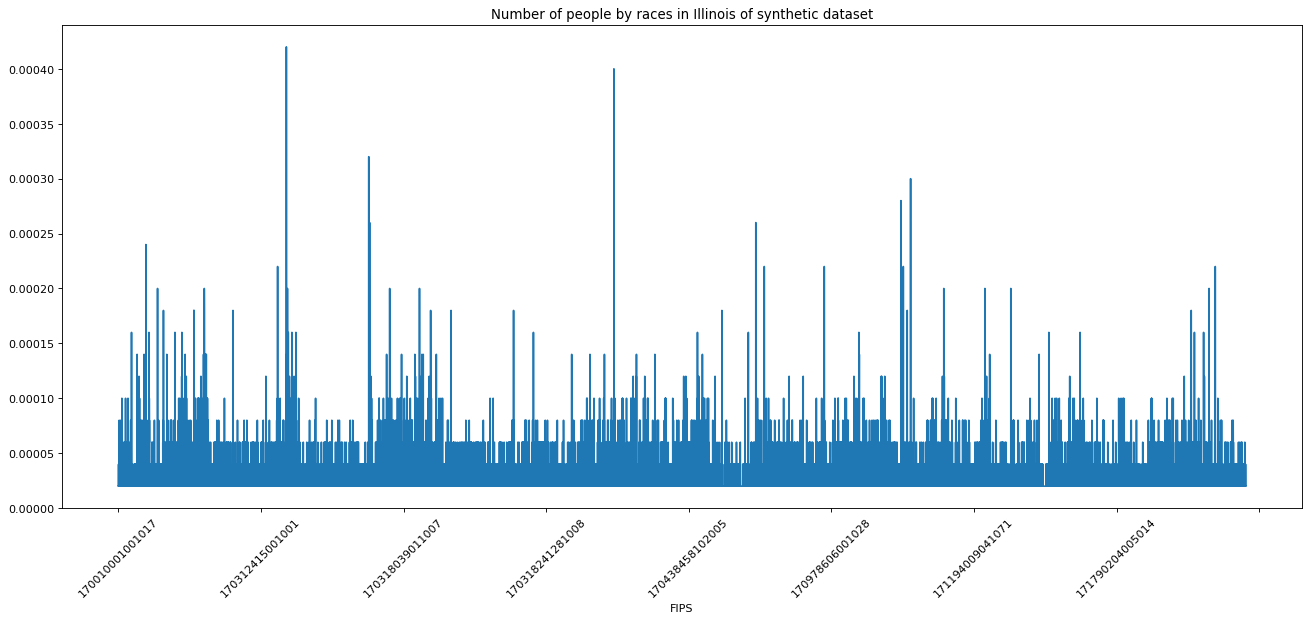

In [74]:
plt.figure(figsize=(20, 8), dpi=80)
popByFIPSSynthesis.plot(x='FIPS', y='Population', rot=0)
plt.title("Number of people by races in Illinois of synthetic dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

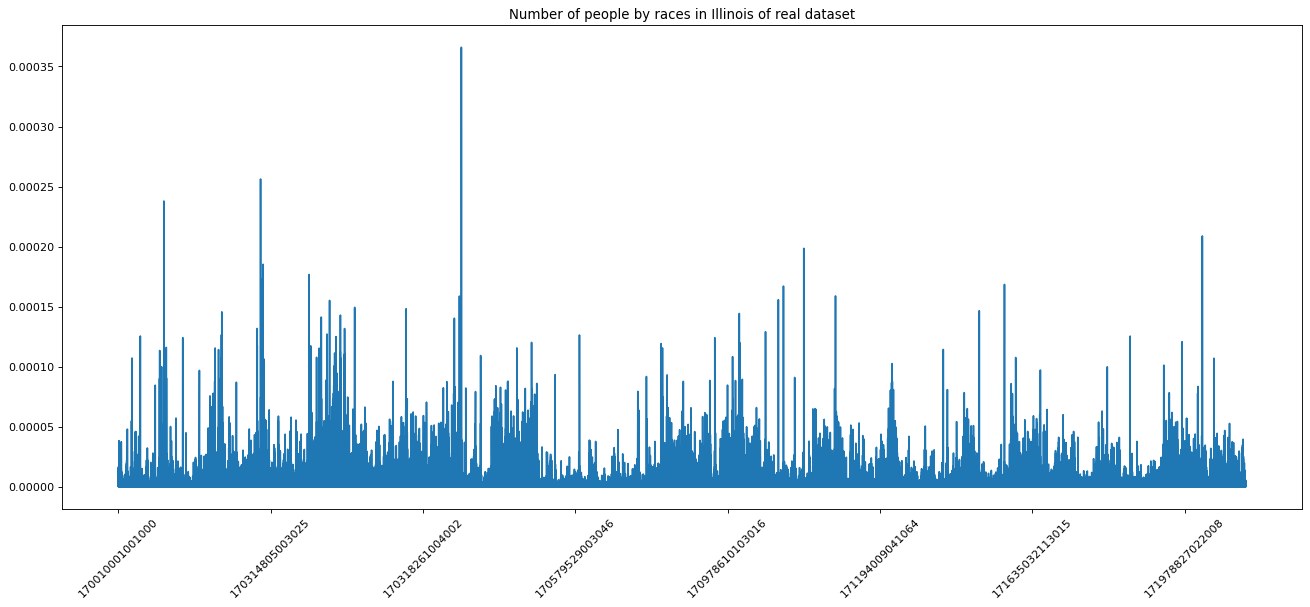

In [75]:
plt.figure(figsize=(20, 8), dpi=80)
popByFIPSReal.plot(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of real dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Test for Homogeneity

$H_0$: The distributions of the two populations are the same.

$H_1$: The distributions of the two populations are not the same.


In [76]:
popByFIPSReal.name = "Real"
popByFIPSSynthesis.name = "Synthesis"
mergeddf = pd.merge(popByFIPSSynthesis, popByFIPSReal, how= 'outer', right_index = True,
               left_index = True).fillna(0)
mergeddf = mergeddf.astype({'Synthesis': 'float32'})
mergeddf

,Synthesis,Real
170010001001000,0.0,1.326759e-06
170010001001001,0.0,1.560893e-07
170010001001002,0.0,0.000000e+00
170010001001003,0.0,0.000000e+00
170010001001004,0.0,0.000000e+00
...,...,...
172030307003228,0.0,8.584912e-07
172030307003229,0.0,0.000000e+00
172030307003230,0.0,0.000000e+00
172030307003231,0.0,5.463126e-07


### Compare sample mean and standard deviation

In [77]:
print("Mean of synthetic dataset", mergeddf["Synthesis"].mean())
print("Standard deviation of synthetic dataset", mergeddf["Synthesis"].std())

Mean of synthetic dataset 2.7039698125008726e-06
Standard deviation of synthetic dataset 9.10801190912025e-06


In [78]:
print("Mean of real dataset", mergeddf["Real"].mean())
print("Standard deviation of real dataset", mergeddf["Real"].std())

Mean of real dataset 2.7028634135016203e-06
Standard deviation of real dataset 5.291909099026957e-06


### Binning FIPS

In [79]:
N = 1000
mergeddf.index = mergeddf.index.map(lambda x : int(x))
binningdf = mergeddf.groupby(mergeddf.index // N).sum()
binningdf

,Synthesis,Real
170010001001,0.00012,0.000089
170010001002,0.00012,0.000058
170010001003,0.00010,0.000072
170010001004,0.00006,0.000071
170010001005,0.00012,0.000073
...,...,...
172030306022,0.00002,0.000096
172030306023,0.00008,0.000091
172030307001,0.00004,0.000081
172030307002,0.00000,0.000063


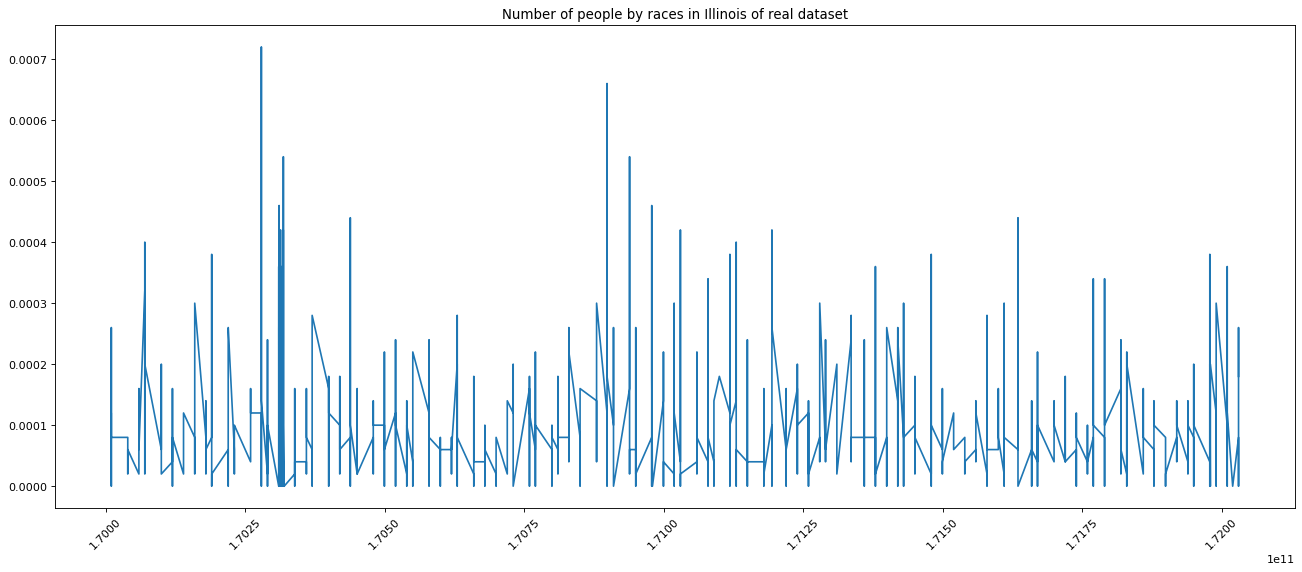

In [80]:
plt.figure(figsize=(20, 8), dpi=80)
binningdf["Synthesis"].plot(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of real dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

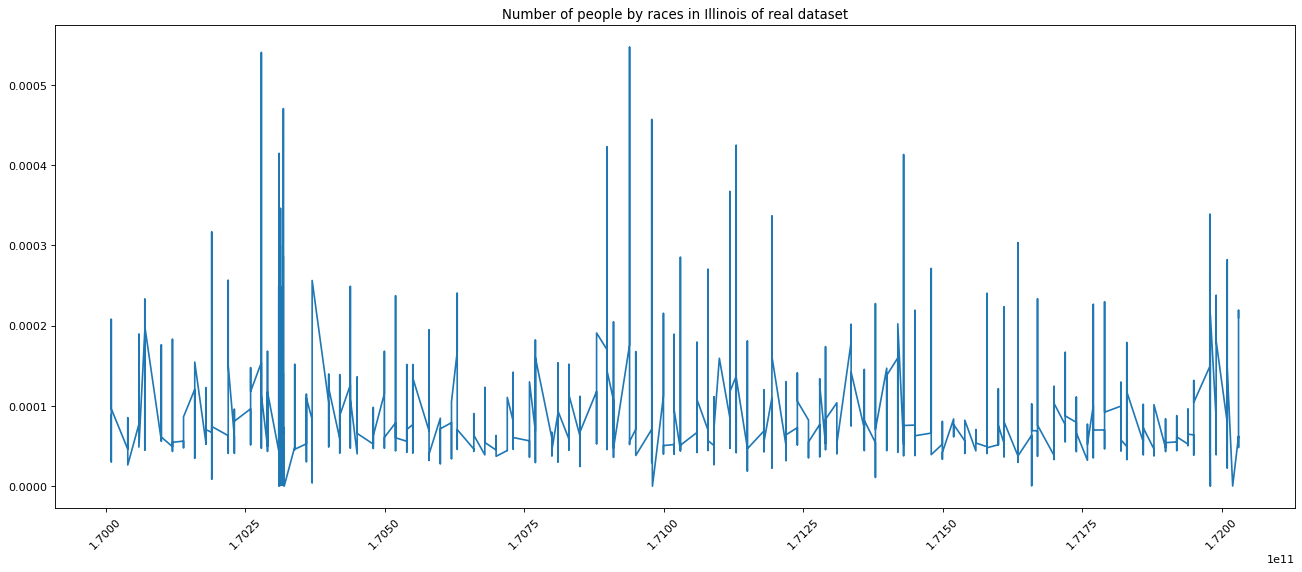

In [81]:
plt.figure(figsize=(20, 8), dpi=80)
binningdf["Real"].plot(x='Race', y='Population', rot=0)
plt.title("Number of people by races in Illinois of real dataset")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Test for Homogeneity

$H_0$: The distributions of the two populations are the same.

$H_1$: The distributions of the two populations are not the same.


In [82]:
ct = pd.crosstab(binningdf["Real"], binningdf["Synthesis"], margins=True)
ct

Synthesis,0.0,1.9999999494757503e-05,3.9999998989515007e-05,5.999999848427251e-05,7.999999797903001e-05,9.999999747378752e-05,0.00011999999696854502,0.0001399999891873449,0.00014000000373926014,0.00015999999595806003,...,0.00037999998312443495,0.00039999998989515007,0.0004199999966658652,0.00043999997433274984,0.00045999998110346496,0.0004600000102072954,0.000539999979082495,0.0006600000197067857,0.0007200000109151006,All
Real,,,,,,,,,,,,,,,,,,,,,
0.0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1.560893011866377e-07,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3.9022325296659424e-07,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7.804465059331885e-07,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8.584911565265073e-07,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.0004571855631756618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0.00047060924307771267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
0.0005406933393105129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [83]:
g, p, dof, expctd = stats.chi2_contingency(ct, lambda_="log-likelihood")

In [84]:
# interpret test-statistic
prob = 0.95
critical = stats.chi2.ppf(prob, dof)
if abs(g) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


In [85]:
p

1.0

Due to p value = 1.0 >> 0.05.Therefore, there is no evidence to support the distributions of the two populations are not the same.

### Compare distribution by two sample t-test

$H_0: \mu_1 = \mu_2$ (population mean of synthetic dataset is equal to real dataset)

$H_1: \mu_1 \neq \mu_2$ (population mean of synthetic dataset is different from real dataset)

In [86]:
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=binningdf["Synthesis"], b=binningdf["Real"], equal_var=True)

Ttest_indResult(statistic=2.448943162675523e-06, pvalue=0.9999980460507389)

Due to p value = 0.9934190781015679 >> 0.05.Therefore, there is no evidence to support the population mean of the two populations are not the same.

### K-S test

$H_0: $ The two datasets come from the same ditribution 

$H_q: $ The two datasets NOT come from the same ditribution 


In [87]:
stats.ks_2samp(binningdf["Real"], binningdf["Synthesis"])

KstestResult(statistic=0.20317235805213174, pvalue=4.216125480064866e-179)

Due to p value = 0.4781688122978446 >> 0.05. Therefore, there is no evidence to support the two datasets NOT come from the same ditribution

## Benchmarking dataset

We will test the dataset by the 